# FORD GO BIKE Exploration 
## by Sara Raafat


## Investigation Overview
 
I am interested to explore whether trips taken in the weekend are more ?and is there a certain day more prefered than other?
what are The average duration of trips?and how the type of user (subscriber,customer) affect the data?Also how the rental access method affect the trips?
## Dataset Overview

 This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.Each trip is anonymized and includes:

Trip Duration (seconds)                                                                                                         
Start Time and Date                                                                                                            
End Time and Date                                                                                                              
Start Station ID                                                                                                              
Start Station Name                                                                                                             
Start Station Latitude                                                                                                         
Start Station Longitude                                                                                                        
End Station ID                                                                                                                 
End Station Name                                                                                                               
End Station Latitude                                                                                                           
End Station Longitude                                                                                                          
Bike ID                                                                                                                         
User Type (Subscriber or Customer – “Subscriber” = Member or “Customer” = Casual)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('201912-baywheels-tripdata.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150102 entries, 0 to 150101
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             150102 non-null  int64  
 1   start_time               150102 non-null  object 
 2   end_time                 150102 non-null  object 
 3   start_station_id         129083 non-null  float64
 4   start_station_name       129087 non-null  object 
 5   start_station_latitude   150102 non-null  float64
 6   start_station_longitude  150102 non-null  float64
 7   end_station_id           128755 non-null  float64
 8   end_station_name         128757 non-null  object 
 9   end_station_latitude     150102 non-null  float64
 10  end_station_longitude    150102 non-null  float64
 11  bike_id                  150102 non-null  int64  
 12  user_type                150102 non-null  object 
 13  rental_access_method     27681 non-null   object 
dtypes: f

In [3]:
df_new = df[(df['start_station_id'].isnull()== False) & (df['end_station_id'].isnull()== False) ]
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 149779
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             125634 non-null  int64  
 1   start_time               125634 non-null  object 
 2   end_time                 125634 non-null  object 
 3   start_station_id         125634 non-null  float64
 4   start_station_name       125634 non-null  object 
 5   start_station_latitude   125634 non-null  float64
 6   start_station_longitude  125634 non-null  float64
 7   end_station_id           125634 non-null  float64
 8   end_station_name         125634 non-null  object 
 9   end_station_latitude     125634 non-null  float64
 10  end_station_longitude    125634 non-null  float64
 11  bike_id                  125634 non-null  int64  
 12  user_type                125634 non-null  object 
 13  rental_access_method     3213 non-null    object 
dtypes: f

In [4]:
df_new['start_time']= pd.to_datetime(df_new['start_time'])


In [5]:
# Remove rows where start or end station id is null 
df_new = df[(df['start_station_id'].isnull()== False) & (df['end_station_id'].isnull()== False) ]
df_new.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 149779
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             125634 non-null  int64  
 1   start_time               125634 non-null  object 
 2   end_time                 125634 non-null  object 
 3   start_station_id         125634 non-null  float64
 4   start_station_name       125634 non-null  object 
 5   start_station_latitude   125634 non-null  float64
 6   start_station_longitude  125634 non-null  float64
 7   end_station_id           125634 non-null  float64
 8   end_station_name         125634 non-null  object 
 9   end_station_latitude     125634 non-null  float64
 10  end_station_longitude    125634 non-null  float64
 11  bike_id                  125634 non-null  int64  
 12  user_type                125634 non-null  object 
 13  rental_access_method     3213 non-null    object 
dtypes: f

In [6]:
#convert start and ed time from string to datetime
df_new['start_time']= pd.to_datetime(df_new['start_time'])
df_new['end_time']= pd.to_datetime(df_new['end_time'])
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125634 entries, 0 to 149779
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             125634 non-null  int64         
 1   start_time               125634 non-null  datetime64[ns]
 2   end_time                 125634 non-null  datetime64[ns]
 3   start_station_id         125634 non-null  float64       
 4   start_station_name       125634 non-null  object        
 5   start_station_latitude   125634 non-null  float64       
 6   start_station_longitude  125634 non-null  float64       
 7   end_station_id           125634 non-null  float64       
 8   end_station_name         125634 non-null  object        
 9   end_station_latitude     125634 non-null  float64       
 10  end_station_longitude    125634 non-null  float64       
 11  bike_id                  125634 non-null  int64         
 12  user_type       

In [7]:
df_new['start_hour'],df_new['start_month'],df_new['weekday'] = df_new['start_time'].dt.hour, df_new['start_time'].dt.month, df_new['start_time'].dt.day_name()
df_new.head(2)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,rental_access_method,start_hour,start_month,weekday
0,66600,2019-12-31 14:28:50.286,2020-01-01 08:58:51.250,364.0,China Basin St at 3rd St,37.772000,-122.389970,349.0,Howard St at Mary St,37.78101,-122.405666,12085,Customer,NaN,14,12,Tuesday
1,36526,2019-12-31 21:52:47.762,2020-01-01 08:01:33.932,38.0,The Embarcadero at Pier 38,37.782926,-122.387921,410.0,Illinois St at Cesar Chavez St,37.75020,-122.386567,9477,Customer,NaN,21,12,Tuesday


## Rides on different days of the week

> We see an increase in the number of rides during weekdays compared to weekends(Saturday,Sunday)

Text(0.5, 1.0, 'Rides count on different days of the week')

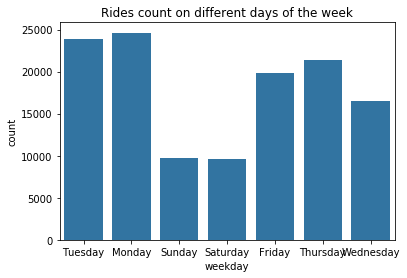

In [12]:
default_color = sb.color_palette()[0]
sb.countplot(data = df_new, x = 'weekday', color = default_color)
plt.title("Rides count on different days of the week")

## Number of rides at different times of the day

> most of the rides start at 8 a.m or 5 p.m ,which are the times where most of people go and return from work

Text(0.5, 1.0, 'Number of rides at different times of the day')

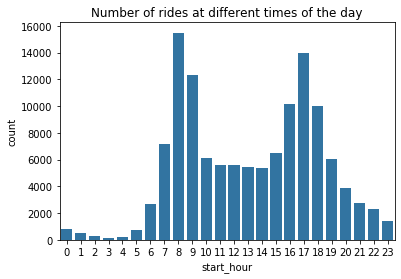

In [13]:
sb.countplot(data = df_new, x = 'start_hour', color = default_color)
plt.title("Number of rides at different times of the day")

## Duration of rides on different days according to the customer type

>We see that customers have longer rides than subscribers. 
Subscribres have short rides on weekends compared to other days.

Text(0.5, 1.0, 'Duration of rides on different days according to the customer type')

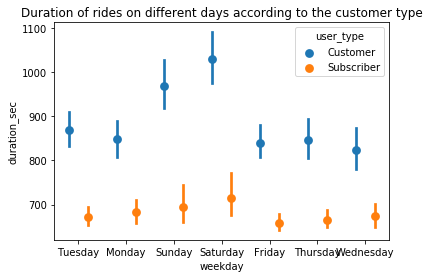

In [14]:
sb.pointplot(data = df_new, x = 'weekday', y = 'duration_sec', hue = 'user_type', linestyles = "", dodge = 0.4)
plt.title("Duration of rides on different days according to the customer type")